In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# read file
emergency = pd.read_csv(r"C:\Users\annie\OneDrive\Documents\Annie Stuff\Grad School\SQL Practice\911.csv")
emergency.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [23]:
# looking at basic info
emergency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


## Data Cleaning

In [25]:
# cleaning data
emergency.drop('e', axis=1, inplace=True)

In [26]:
# dropping rows where township is null. choosing to drop the rows because null values only make up than < 1% of the entire data
emergency = emergency.dropna(subset=['twp'])

In [27]:
# renaming columns for clarification
rename_col_dict = {'lat': 'latitude', 'lng': 'longitude', 'desc': 'description', 'twp': 'township', 'addr': 'address'}
emergency.rename(columns=rename_col_dict, inplace=True)

In [47]:
# updating time stamp to two columns: date and time
emergency['timeStamp'] = pd.to_datetime(emergency['timeStamp'])

emergency['date'] = emergency['timeStamp'].dt.date
emergency['time'] = emergency['timeStamp'].dt.time

# dropping timeStamp column
emergency.drop('timeStamp', axis=1, inplace=True)

In [29]:
# convert zip to object and remove decimal
emergency['zip'] = emergency['zip'].astype(str).str.split('.').str[0]

In [30]:
# split title into overall category and details, and delete title column
emergency[['issue_category', 'details']] = emergency['title'].str.split(': ', expand=True)
emergency.drop(columns='title', inplace=True)

In [48]:
emergency.head()

,latitude,longitude,description,zip,township,address,date,time,issue_category,details,year,month,weekday,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10,17:10:52,EMS,BACK PAINS/INJURY,2015,12,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10,17:29:21,EMS,DIABETIC EMERGENCY,2015,12,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,NORRISTOWN,HAWS AVE,2015-12-10,14:39:21,Fire,GAS-ODOR/LEAK,2015,12,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10,16:47:36,EMS,CARDIAC EMERGENCY,2015,12,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015-12-10,16:56:52,EMS,DIZZINESS,2015,12,Thursday,16


In [16]:
emergency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663229 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        663229 non-null  float64
 1   longitude       663229 non-null  float64
 2   description     663229 non-null  object 
 3   zip             663229 non-null  object 
 4   township        663229 non-null  object 
 5   address         663229 non-null  object 
 6   date            663229 non-null  object 
 7   time            663229 non-null  object 
 8   issue_category  663229 non-null  object 
 9   details         663229 non-null  object 
dtypes: float64(2), object(8)
memory usage: 55.7+ MB


## Analysis

### Deep dive regarding emergency call categories

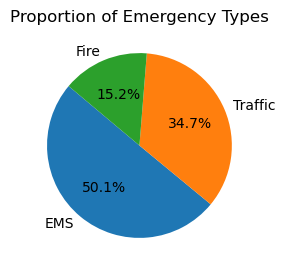

In [33]:
# looking at overall proportions of categories
issue_type = emergency.value_counts('issue_category')
plt.figure(figsize=(3, 3))
plt.pie(issue_type.values, labels=issue_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Emergency Types')
plt.show()

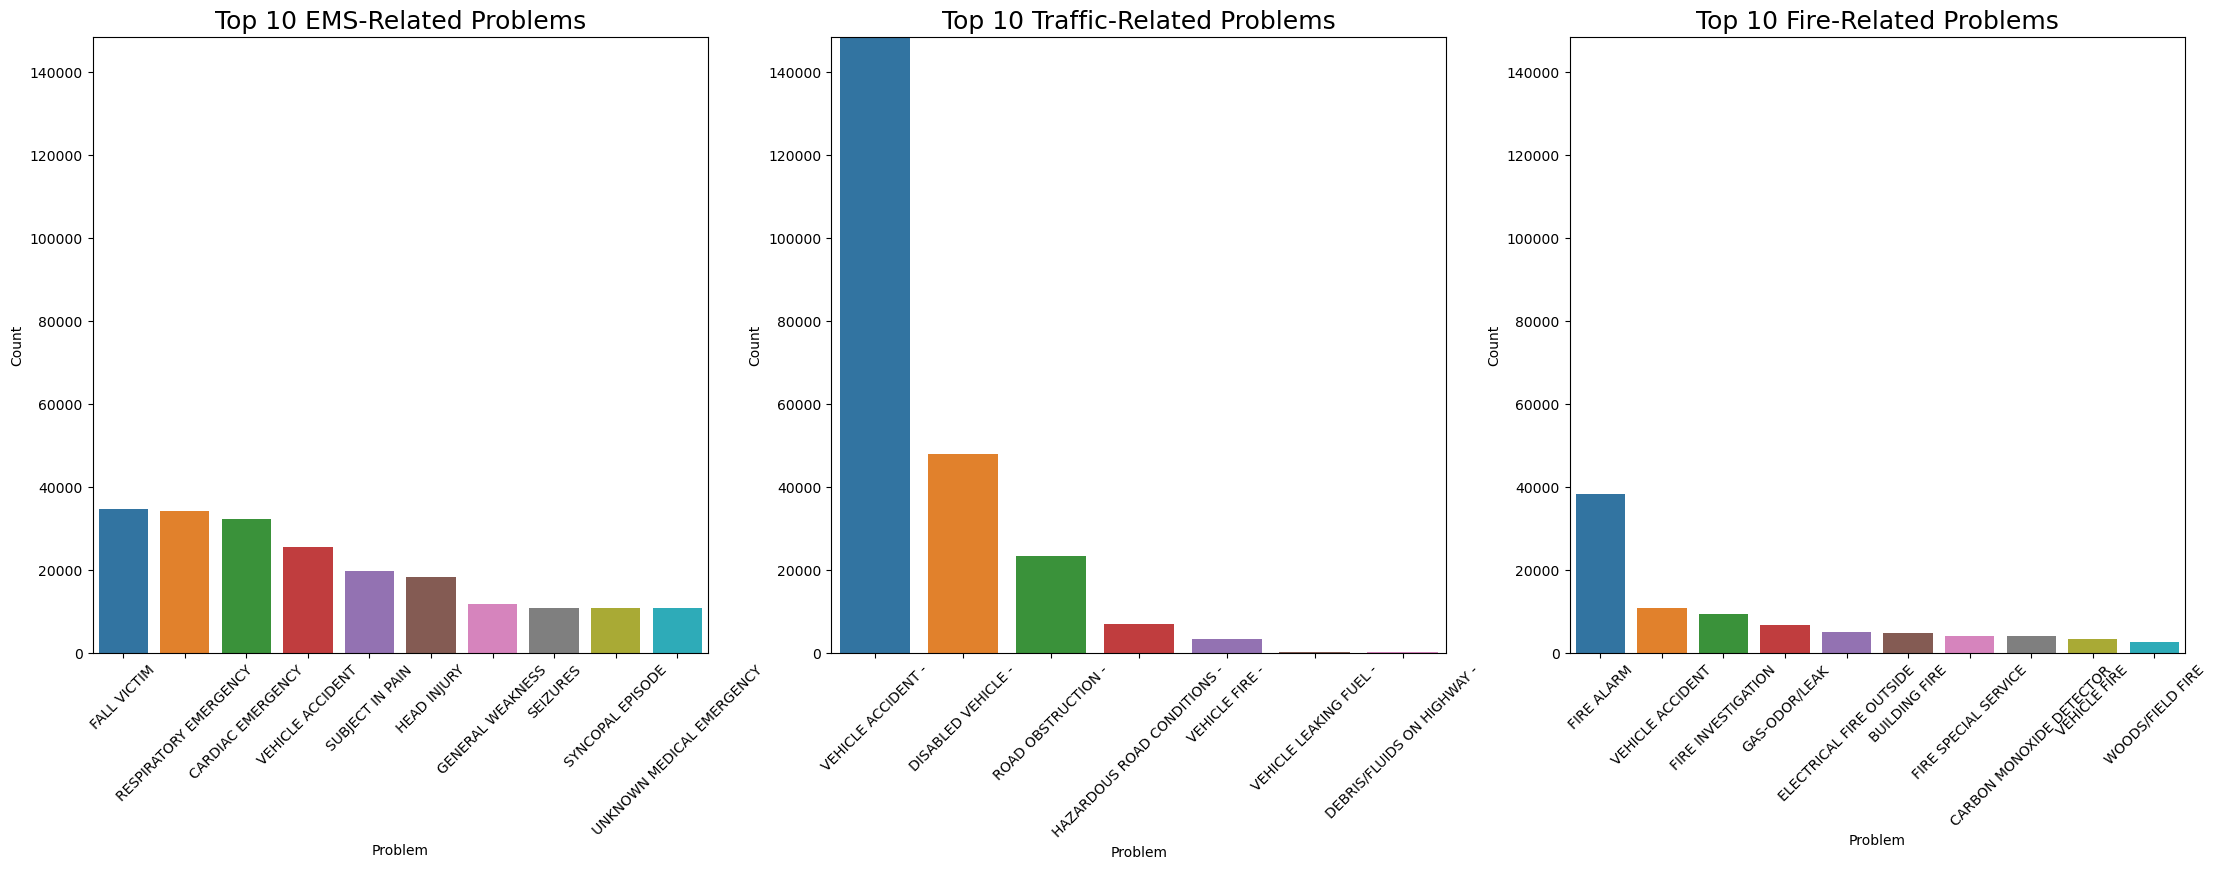

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(27, 8))

# Initialize a variable to store the maximum y-axis value across all plots
max_y = 0

# Plot for "EMS" category
ems_data = emergency[emergency['issue_category'] == 'EMS']
ems_top_10 = ems_data['details'].value_counts().head(10)
sns.barplot(x=ems_top_10.index, y=ems_top_10.values, ax=axes[0])
axes[0].set_xlabel('Problem')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 EMS-Related Problems', fontsize=18)
axes[0].tick_params(axis='x', rotation=45)

# Update max_y if necessary
max_y = max(max_y, ems_top_10.values.max())

# Plot for "Traffic" category
traffic_data = emergency[emergency['issue_category'] == 'Traffic']
traffic_top_10 = traffic_data['details'].value_counts().head(10)
sns.barplot(x=traffic_top_10.index, y=traffic_top_10.values, ax=axes[1])
axes[1].set_xlabel('Problem')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Traffic-Related Problems', fontsize=18)
axes[1].tick_params(axis='x', rotation=45)

# Update max_y if necessary
max_y = max(max_y, traffic_top_10.values.max())

# Plot for "Fire" category
fire_data = emergency[emergency['issue_category'] == 'Fire']
fire_top_10 = fire_data['details'].value_counts().head(10)
sns.barplot(x=fire_top_10.index, y=fire_top_10.values, ax=axes[2])
axes[2].set_xlabel('Problem')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Fire-Related Problems', fontsize=18)
axes[2].tick_params(axis='x', rotation=45)

# Update max_y if necessary
max_y = max(max_y, fire_top_10.values.max())

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(0, max_y)

# Show the plots
plt.show()

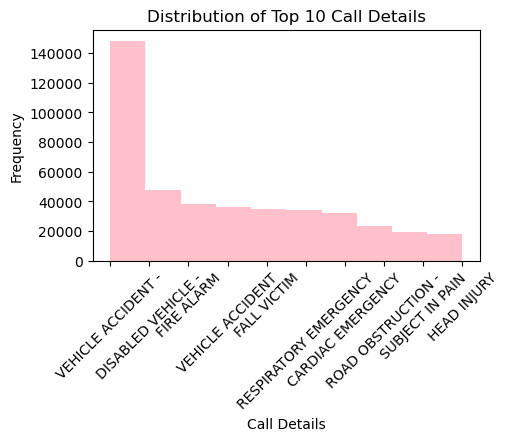

In [35]:
# looking at counts by problem
unique_problem_count = emergency['details'].value_counts()
unique_top_10 = unique_problem_count.head(10)

# Create a histogram for the top 10 call details
plt.figure(figsize=(5, 3))
plt.hist(unique_top_10.index, weights=unique_top_10.values, bins=len(unique_top_10), color='pink')
plt.xlabel('Call Details')
plt.ylabel('Frequency')
plt.title('Distribution of Top 10 Call Details')
plt.xticks(rotation=45)
plt.show()

While EMS accounts for 50%, but majority of issues are vehicle accidents

### Exploring time stamps and relationship to the calls

In [36]:
# range of date
max_date = emergency['date'].max()
min_date = emergency['date'].min()
print(f'This datas capture emergency calls from {min_date} to {max_date}')

This datas capture emergency calls from 2015-12-10 to 2020-07-29


In [37]:
# extracting year, month and day from date
emergency['date'] = pd.to_datetime(emergency['date'])
emergency['year'] = emergency['date'].dt.year
emergency['month'] = emergency['date'].dt.month
emergency['weekday'] = emergency['date'].dt.strftime('%A')

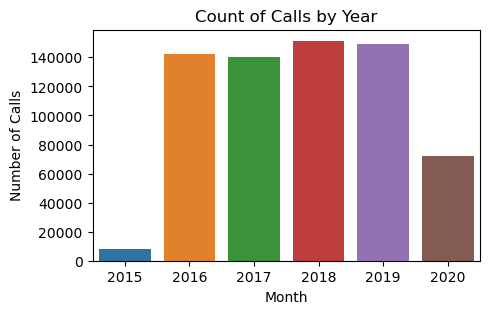

In [38]:
emergency_counts = emergency.groupby('year').size().reset_index(name='calls')

# Plot the count of issues per year
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=emergency_counts, x='year', y='calls')
plt.title('Count of Calls by Year')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

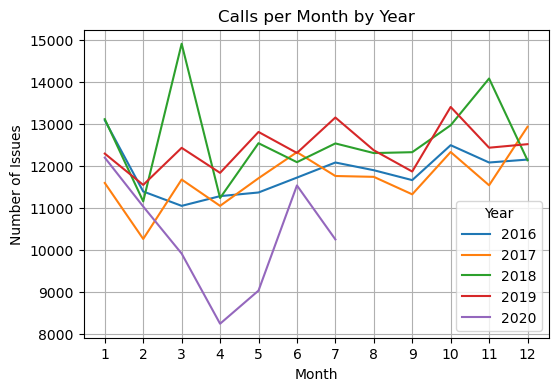

In [39]:
emergency_counts = emergency.groupby(['year', 'month']).size()

# Plot a line for each year by month
fig, ax = plt.subplots(figsize=(6, 4))
for year in range(2016, 2021):
    year_data = emergency_counts.loc[year]
    plt.plot(year_data.index.get_level_values('month'), year_data.values, label=year)

plt.title('Calls per Month by Year')
plt.xlabel('Month')
plt.ylabel('Number of Issues')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [40]:
# average calls by month
avg_call_month = emergency.groupby('month').size().reset_index(name='calls')

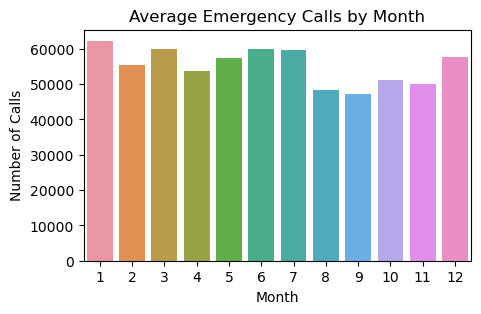

In [41]:
plt.figure(figsize=(5, 3))
sns.barplot(data=avg_call_month, x='month', y='calls')

plt.title('Average Emergency Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

In [42]:
emergency['time'] = pd.to_datetime(emergency['time'], format='%H:%M:%S')
emergency['hour'] = emergency['time'].dt.hour
avg_call_hour = emergency.groupby('hour').size().reset_index(name='calls')

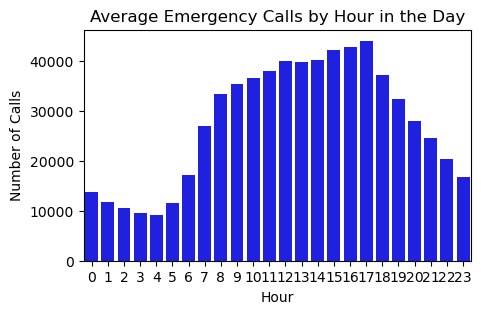

In [43]:
plt.figure(figsize=(5, 3))
sns.barplot(data=avg_call_hour, x='hour', y='calls', color='blue')

plt.title('Average Emergency Calls by Hour in the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

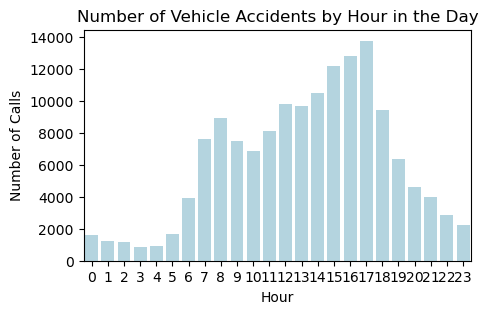

In [44]:
vehicle_accidents = emergency[emergency['details'] == 'VEHICLE ACCIDENT -']
vehicle_accidents_hour = vehicle_accidents.groupby('hour').size().reset_index(name='calls')

plt.figure(figsize=(5, 3))
sns.barplot(data=vehicle_accidents_hour, x='hour', y='calls', color='lightblue')

plt.title('Number of Vehicle Accidents by Hour in the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()